In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv('megafon.csv')
df

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68
...,...,...,...,...,...,...,...,...,...,...,...
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251
3109,3110,10,NaN,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202


## Подготовка данных

In [3]:
# Переименуем длынные названия столбцов в более короткие для удобвства использования
df.rename(columns={'Total Traffic(MB)': 'TT', 'Downlink Throughput(Kbps)': 'DT', 
                  'Uplink Throughput(Kbps)':'UT', 'Downlink TCP Retransmission Rate(%)': 'DRR',
                  'Video Streaming Download Throughput(Kbps)': 'VSDT',
                   'Video Streaming xKB Start Delay(ms)':'VSSD', 'Web Page Download Throughput(Kbps)':'WPDT',
                  'Web Average TCP RTT(ms)':'WA_ping'}, inplace=True)

In [4]:
# Посомтрим на типы данных
df.dtypes

user_id      int64
Q1          object
Q2          object
TT         float64
DT         float64
UT         float64
DRR        float64
VSDT       float64
VSSD         int64
WPDT       float64
WA_ping      int64
dtype: object

In [5]:
# Видим, что колонка Q1 имеет тип object, а ответы предполагают оценку от 1 до 10
# Смотрим какие ответы вообще были на первый впорос.
df['Q1'].unique()

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '11', '6', '2, 9',
       '0', '1, 3', '19', '15', nan, '1, 6', '***** ** ***',
       '3 - дер.Ширяево Волоколамского района, 9 - в Москве', '10, 9',
       'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !',
       'ОЦЕНКА-3/НЕВАЖНО/', 'Отвратительно',
       'Я ценой услуг не удовлетворен', 'Пока не понял', '3, 9', '5, 6',
       '0, 1, 5', '5, 7', 'Hi',
       '4. Тульская область Заокский район. Романовские дачи связи почти нет',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю',
       '10, 50',
       'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555', '?',
       'Поохое',
       'Когда в Москве-10 а когда в калужской области в деревне Бели-1',
       'Нет', 'Да', 'Ужасно',
       '3 тройка, связь отвратительная, жалко платить за такой тарив',
       'Чдтчдтччдтччч', '3, 7', '20, 89031081392', '1, 8', 'Без з',
       '10, 5', '2, 5',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном с

In [6]:
# Нас интересуют только численные оценки от 1 до 10, поэтому оставим только эти ответы и удалим все не подходящие ответы
# Так же сделаем этот столбец числового типа
answers = ['1', '2','3','4','5','6','7','8','9', '10']
df = df[df['Q1'].isin(answers)]
df = df.astype({'Q1':'int'})
df

,user_id,Q1,Q2,TT,DT,UT,DRR,VSDT,VSSD,WPDT,WA_ping
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68
...,...,...,...,...,...,...,...,...,...,...,...
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251
3109,3110,10,NaN,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202


In [7]:
# Посомтрим на ответы на второй вопрос
df['Q2'].unique()

array([nan, '4', '3', '2, 3, 4', '4, 5', '1, 3, 4', '1, 3, 4, 5', '1, 3',
       '3, 4', '1, 2', '3, 5', '1', '7', '1, 4', '1, 2, 3, 4, 5', '2, 3',
       '1, 2, 3, 4', '2, 3, 4, 5', '3, 4, 5', '1, 2, 5', '1, 5',
       '1, 2, 4', '6', '1, 4, 5', '1, 2, 3', '2, 5', '2, 4, 5', '1, 2, 7',
       '5', '2', '1, 2, 3, 4, 5, 6', '0, 1, 7', '4, 7', '1, 4, 7', '0, 3',
       '1, 3, 4, 5, 7', '3, 7', '1, 3, 4, 7', '3, 4, 5, 7', '2, 4',
       '5, 6', '1, 2, 3, 5', '1, 3, 5', '1, 2, 34', '1, 2, 4, 5',
       '0, 05, 2, 27, 7', '1, 3, 7', '3, 4, 7', '1, 2, 3, 4, 7', '10',
       '0', '1, 2, 3, 7'], dtype=object)

In [8]:
#Видно, что ответы в виде перечислений номеров ответа
#Поэтому разобъем ответы на второй впорос по отдельным строкам соответсвнно каждому пользователю и ответу на первый вопрос
df.Q2.fillna({i: '0' for i in df.index}, inplace=True) # заменим все пустые значения на 0
df_ans2 = (df.set_index(['user_id', 'Q1','TT','DT','UT','DRR','VSDT','VSSD','WPDT','WA_ping'])
   .stack()
   .str.split(r', ', expand=True)
   .stack()
   .unstack(-2)
   .reset_index(-1, drop=True)
   .reset_index()
)

In [9]:
#Уберем не подходящие ответы как и с ответами на первый вопрос
answers = ['1', '2', '3', '4', '5', '6', '7'] # Отсутвие ответа, то есть 0, не может быть значимым для нас 
df_ans2 = df_ans2[df_ans2['Q2'].isin(answers)]
df_ans2 = df_ans2.astype({'Q2':'int'})
df_ans2

,user_id,Q1,TT,DT,UT,DRR,VSDT,VSSD,WPDT,WA_ping,Q2
1,2,5,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,4
2,3,1,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,4
3,4,8,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,3
4,5,2,351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,2
5,5,2,351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,3
...,...,...,...,...,...,...,...,...,...,...,...
4225,3109,3,171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251,3
4226,3109,3,171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251,4
4227,3109,3,171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251,5
4229,3111,6,827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202,1


Данные подготовены. Имее два набора данных: один для исследования зависимости первой оценки, второй - для второй оценки.

## Корреляциионный анализ ответов на первый вопрос и технических характеристик
Самый быстрый и простой способ выявить зависимость одной переменной от другой - это провести корреляционный анализ. Корреляция покажет, существует ли связь между техническими характеристиками и ответами пользователей и на сколько она сильна. Чем больше коэффициент корреляции, тем большее влияние технический параметр оказывает на ответ пользователя. 
#### Это позволит определить на улучшение какой технической характеристики стоит больше обратить внимание.

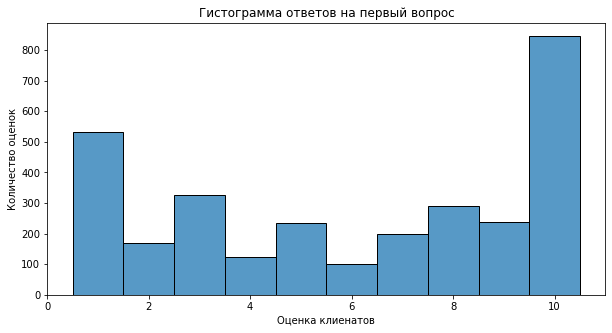

In [10]:
# Построим гистограмму распеределения ответов на первый вопрос
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='Q1', discrete=True)
ax.set_title('Гистограмма ответов на первый вопрос')
ax.set_xlabel('Оценка клиенатов')
ax.set_ylabel('Количество оценок')
plt.show()

Видно большое количество положительных оценок. Но так же большое количество минимальной оценки - 1. 
Попробуем определить, как влияют технические показатели на ответы респондентов. 

Построим визуализацию корреляций технических показателей пользователей

In [13]:
# Определим интересующие нас колонки из датасета
cols = ['Q1','TT','DT','UT','DRR','VSDT','VSSD','WPDT','WA_ping']

<AxesSubplot:>

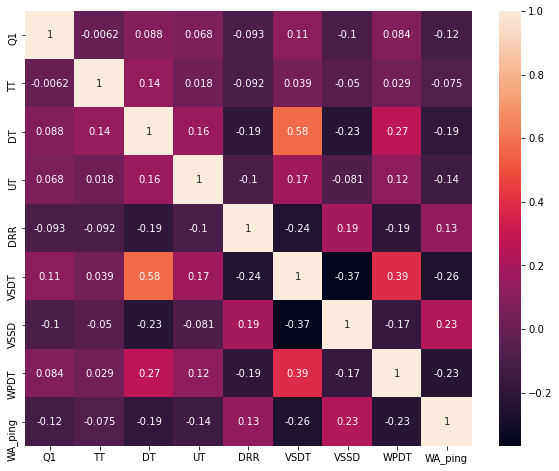

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df[cols].corr(), cbar=True, annot=True)

Видно, что линейные корреляционные связи довольно слабые, лишь одна пара технических показателей имеет заметную корреляционную связь.

Проверим распределение технических характеристик на нормальность. Выдвинем гипотезу, что характеристики для каждого ответа распределены нормально и проверим эту гипотезу с помощью критерия Шапиро-Уилка.

In [15]:
for i in range(1,11):
    for j in cols[1:]:
        df_norm = df[df['Q1']==i]
        stat, p = scipy.stats.shapiro(df_norm[j]) # тест Шапиро-Уилк

        print('Statistics=%.3f, p-value=%.3f' % (stat, p))

        alpha = 0.05
        print('Для технического показателя ' +str(j)+ ' и ответа '+str(i))
        if p > alpha:
            print('Принять гипотезу о нормальности \n')
        else:
            print('Отклонить гипотезу о нормальности \n')

Statistics=0.935, p-value=0.000
Для технического показателя TT и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.548, p-value=0.000
Для технического показателя DT и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.652, p-value=0.000
Для технического показателя UT и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.496, p-value=0.000
Для технического показателя DRR и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.717, p-value=0.000
Для технического показателя VSDT и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.710, p-value=0.000
Для технического показателя VSSD и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.499, p-value=0.000
Для технического показателя WPDT и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.482, p-value=0.000
Для технического показателя WA_ping и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.927, p-value=0.000
Для технического показателя TT и ответа 2
Отклонить гипотезу о нормальности 

Тест показал, что данные по техническим характеристикам не имеют нормального распределения. Во всех случаях гипотеза о нормальности распределения не подтвердилась.

Посторим гистограммы технических характеристик для каждого ответа

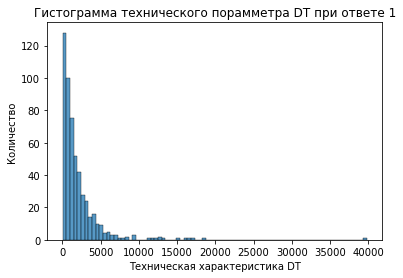

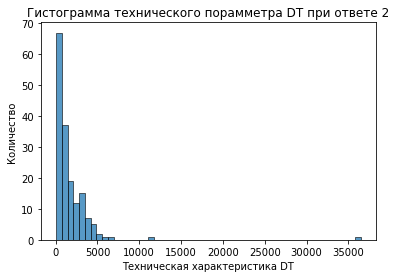

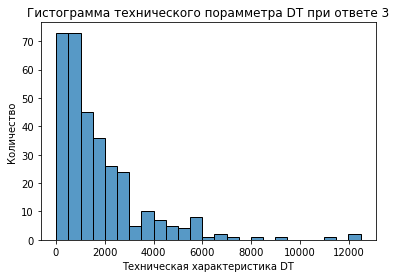

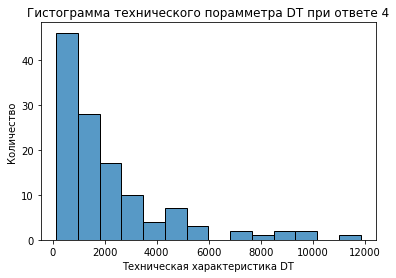

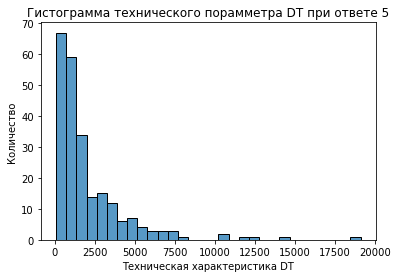

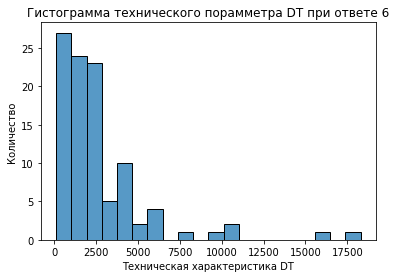

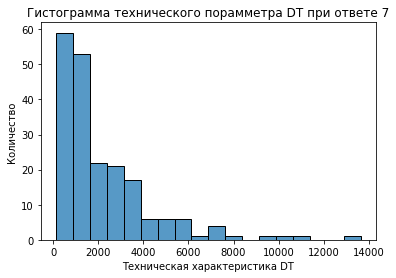

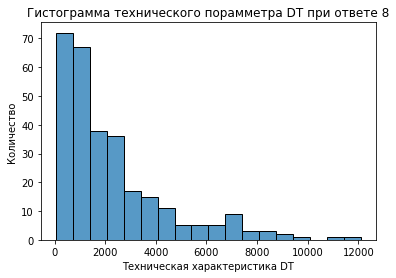

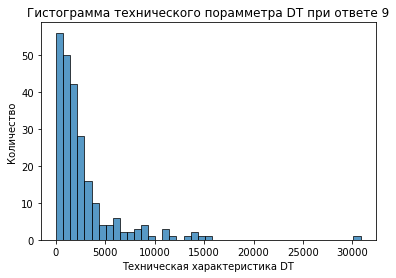

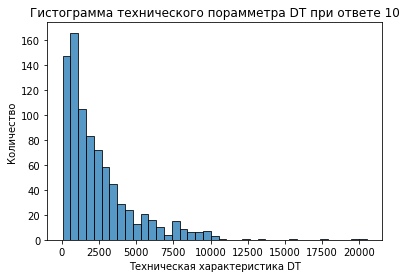

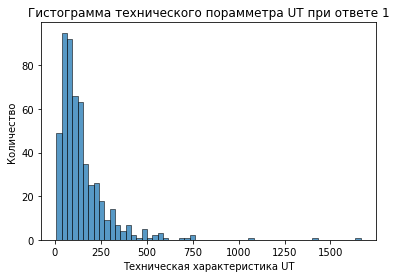

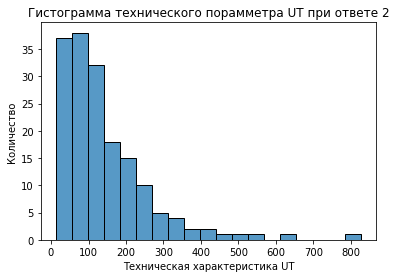

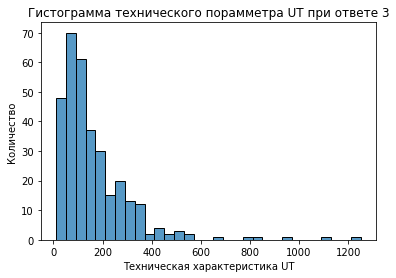

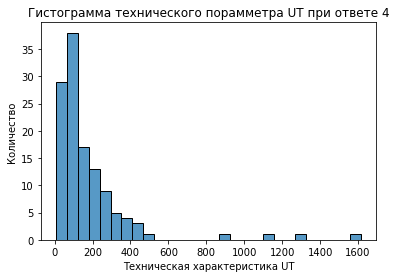

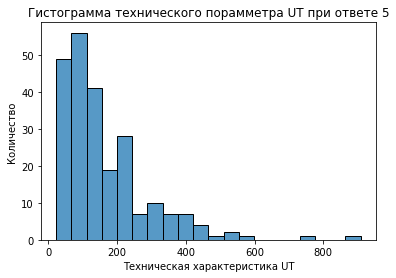

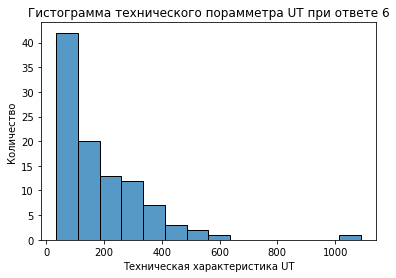

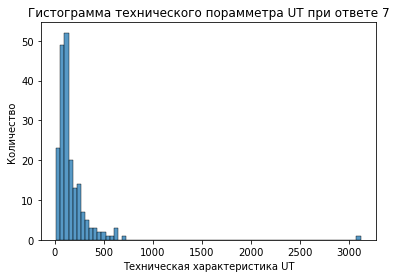

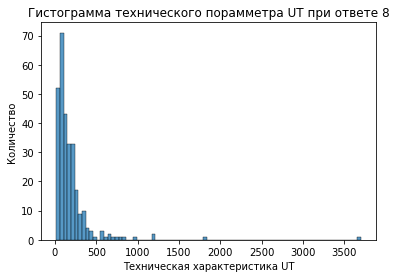

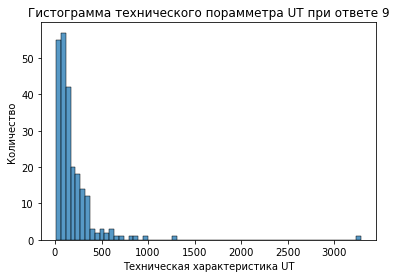

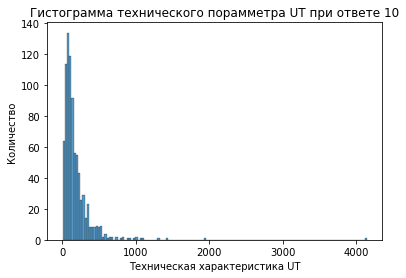

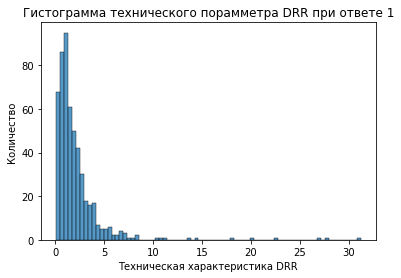

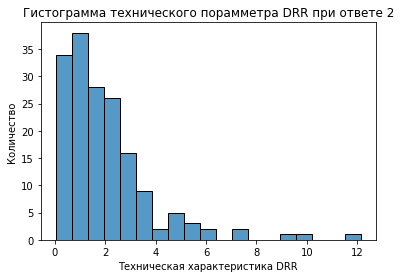

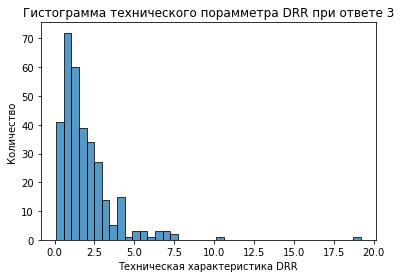

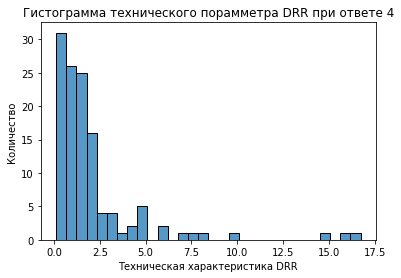

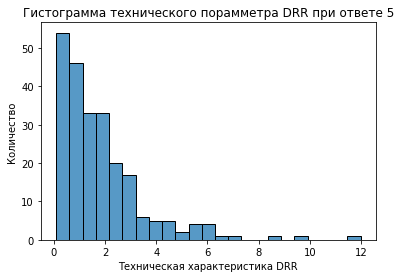

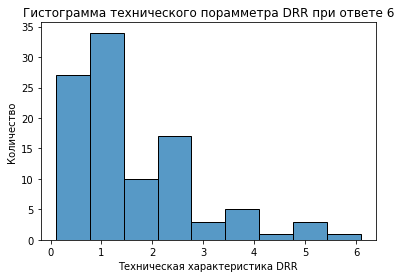

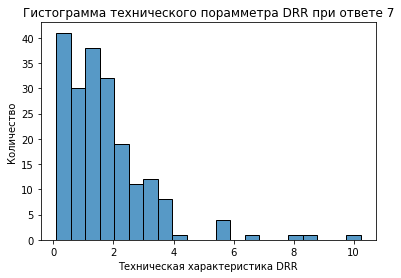

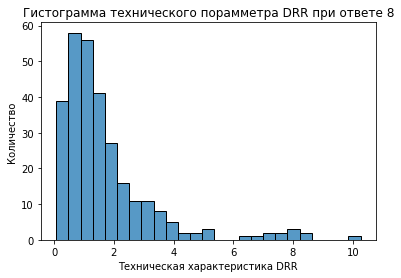

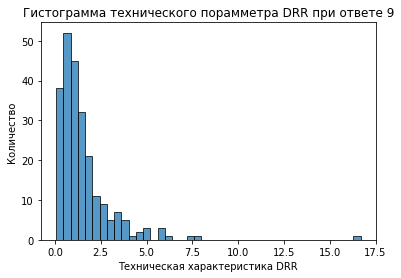

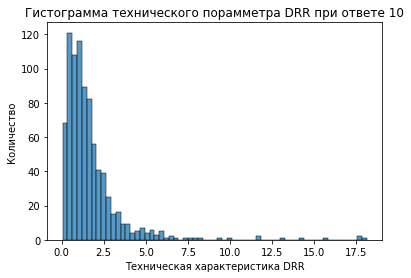

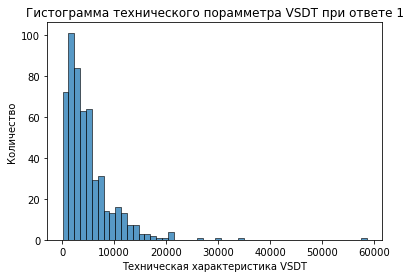

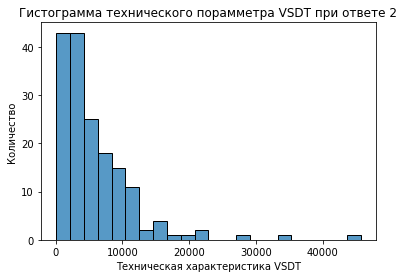

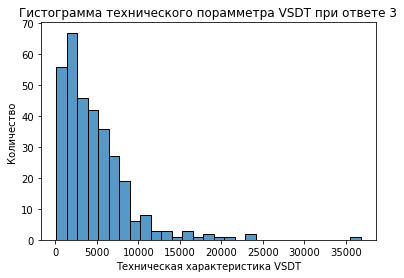

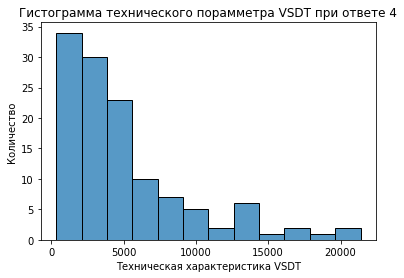

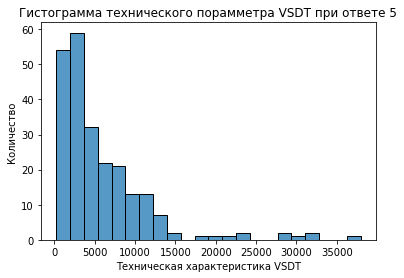

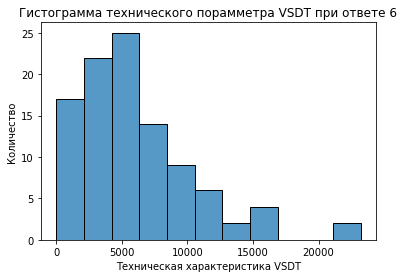

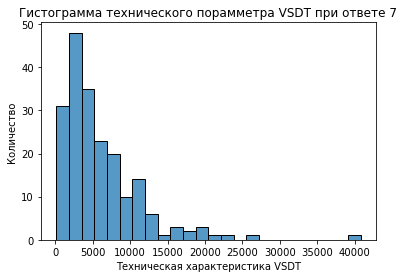

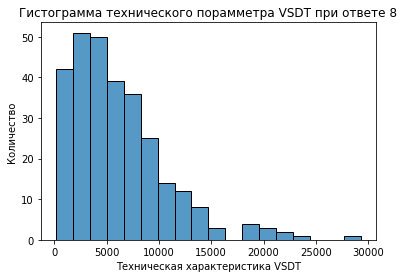

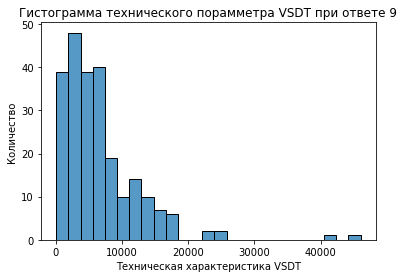

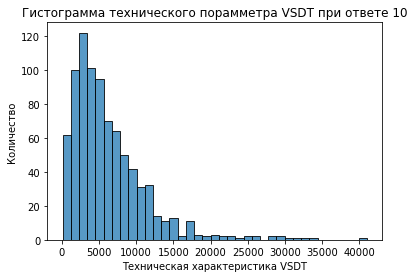

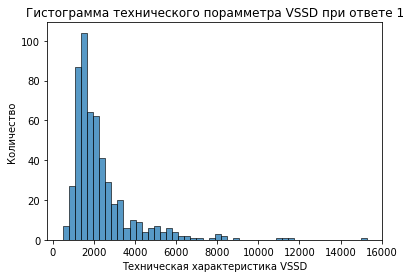

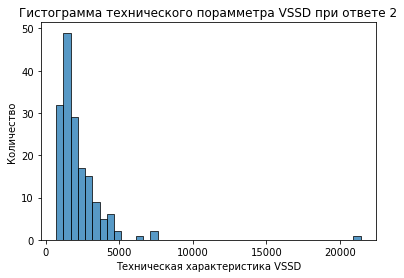

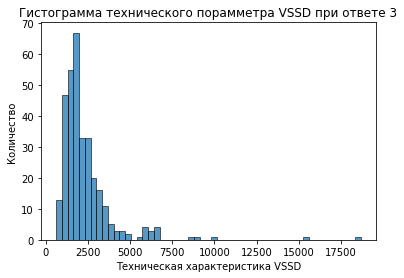

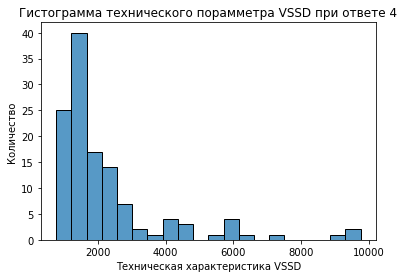

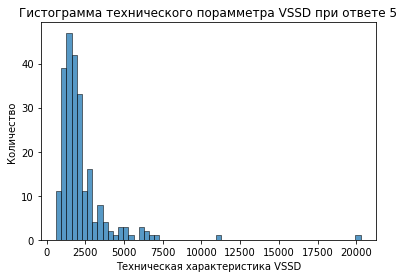

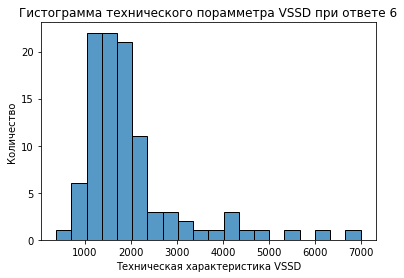

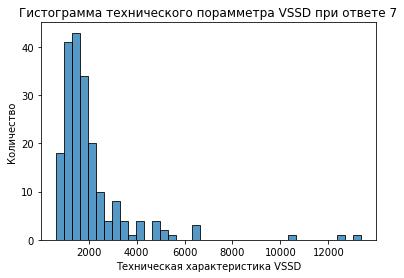

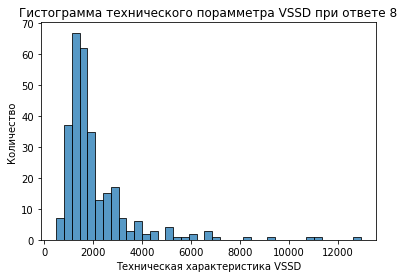

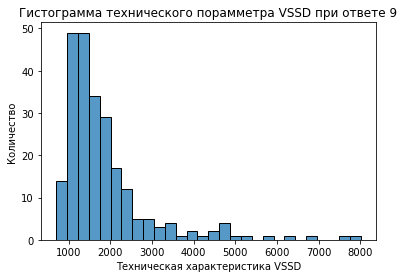

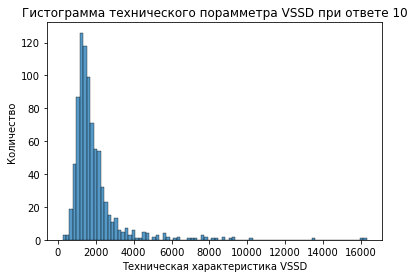

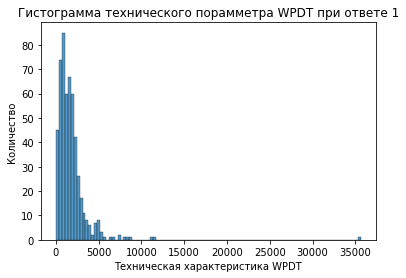

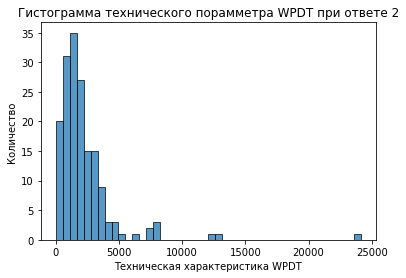

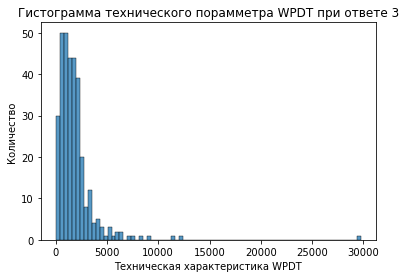

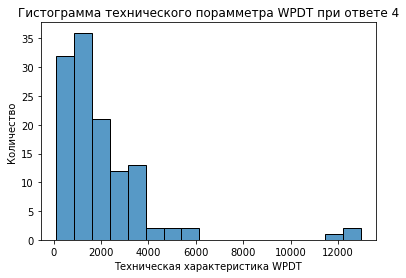

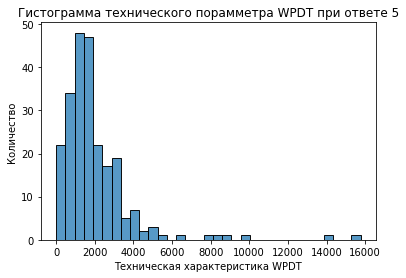

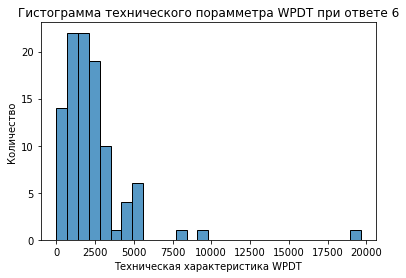

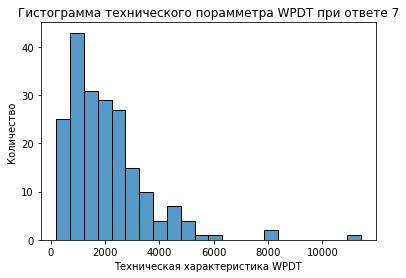

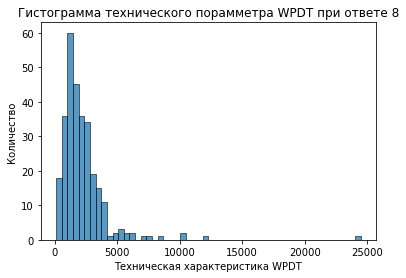

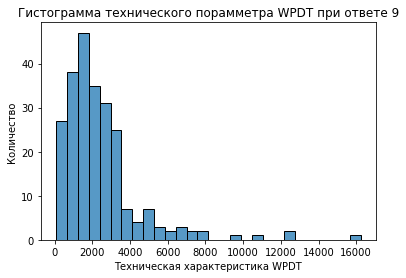

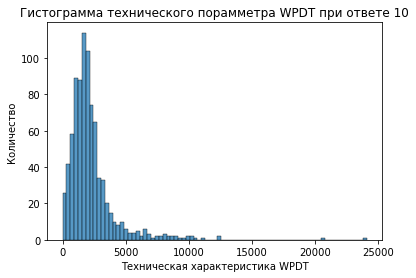

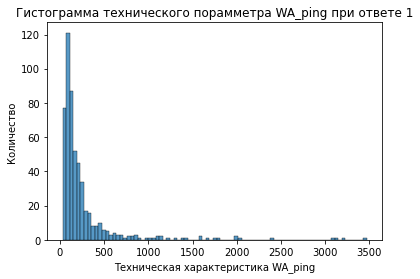

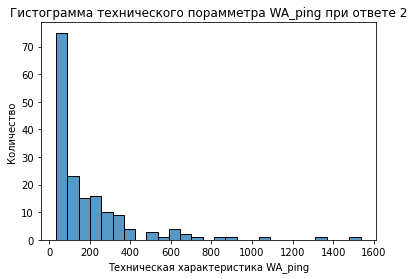

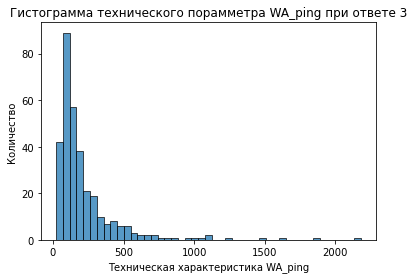

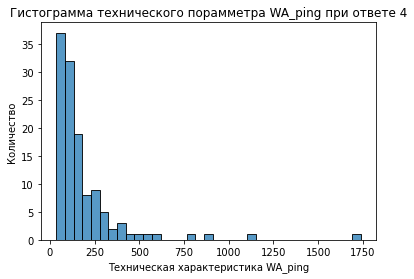

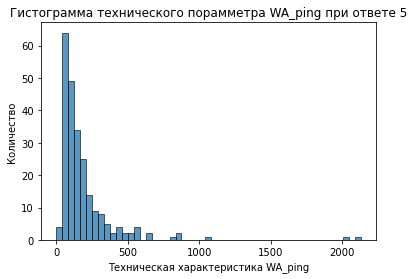

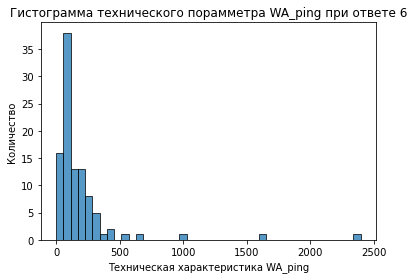

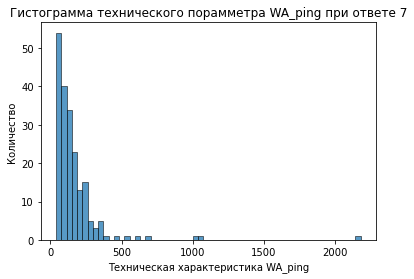

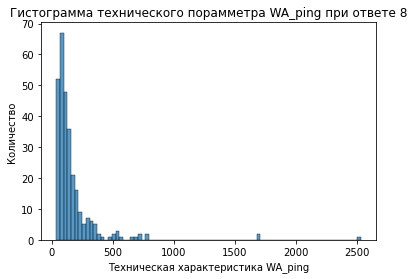

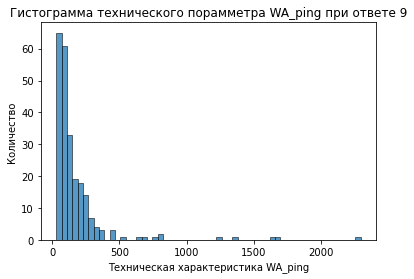

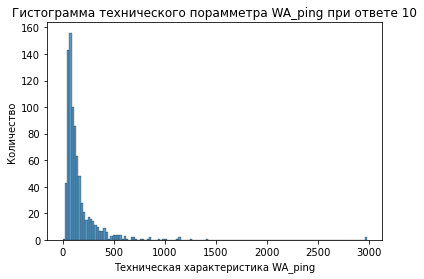

In [18]:
for i in cols[2:]: # исключим объем трафика пользователей, этот показатель слишком индивидуален
    for j in range(1,11): 
        df_norm = df[df['Q1']==j]
        sns.histplot(data=df_norm, x=i)
        plt.title('Гистограмма технического порамметра '+str(i)+' при ответе ' +str(j))
        plt.xlabel('Техническая характеристика ' +str(i))
        plt.ylabel('Количество')
        plt.show()

На гистограммах также видно, что технические параметры в каждом ответе смещены к минимальным значениям.

Посомтрим как распределяются технические характеристики относительно ответов. Построим диаграммы рассеяния технических показателей относительно ответов на первый вопрос.

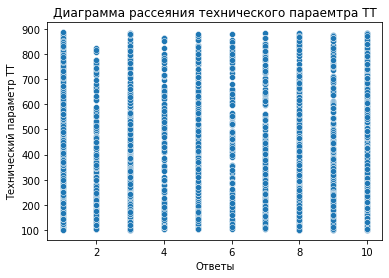

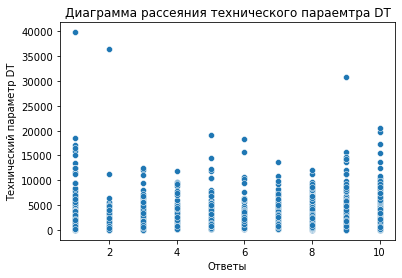

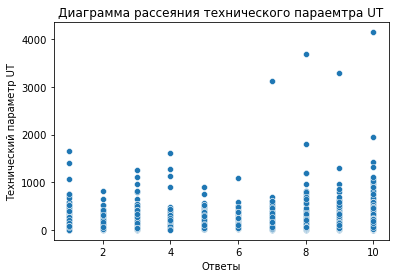

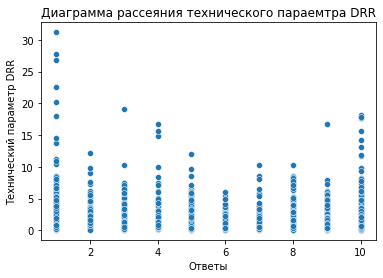

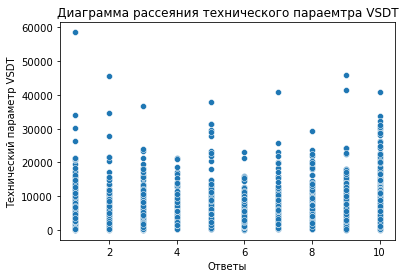

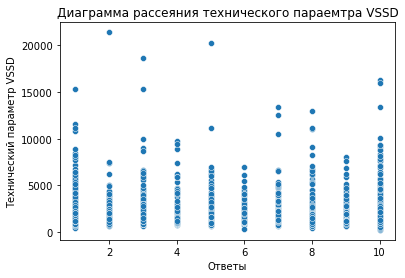

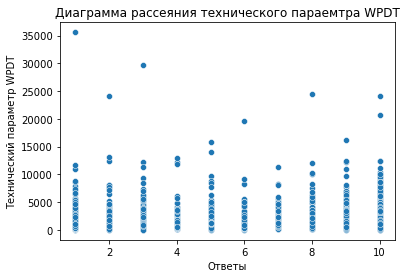

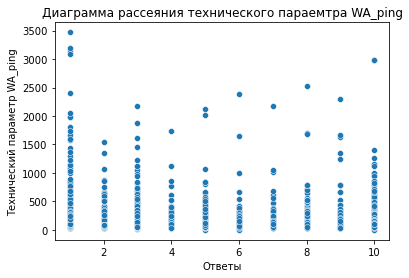

In [17]:
for i in cols[1:]:
    sns.scatterplot(data=df, x='Q1', y=i,)
    plt.title('Диаграмма рассеяния технического параемтра '+str(i))
    plt.xlabel('Ответы')
    plt.ylabel('Технический параметр '+str(i))
    plt.show()

В каждом ответе большинство значений каждой техничческой характерестики находится в одних и тех же значениях. Можно сделать вывод, что линейных связей между ответами пользователей и их техническими характеристиками не выявлено. Также по диаграммам рассеяния можно увидеть, что не линейных корреляционных связей также нет.

Посморим на корреляционные связи ответов с техническими характеристиками. Для выявления корреляции используем тест Спирмена, так как распределение технических характеристик не является нормальным.

In [19]:
df.corrwith(df['Q1'], method='spearman')

user_id    0.005164
Q1         1.000000
TT        -0.008961
DT         0.126461
UT         0.071708
DRR       -0.099591
VSDT       0.143572
VSSD      -0.147575
WPDT       0.144704
WA_ping   -0.135203
dtype: float64

Корреляционные связи по шкале заметной значимости Чеддока - слабые. Наиболее сильные корреляционные связи ответов на первый вопрос с такими техническими характеристикам как воспроизведение потокового видео (VSDT), задержка старта воспроизведения видео (VSSD) и скоростью загрузки Web-страниц (WPDT). Можно на них обратить внимание в первую очередь техническому отделу.
##### Можно окончательно опровергнуть гипотезу, что технические характеристики влияют на ответы пользователей в проведенном опросе на первый вопрос .

## Корреляционный анализ ответов на второй вопрос и технических характеристик
Проведем корреляционный анализ ответов на второй вопрос и технических характеристик. Выдвинем гипотезу, что технические характеристики влияют на ответы на второй вопрос.
#### Это позволит определить на улучшение какой технической характеристики стоит больше обратить внимание.

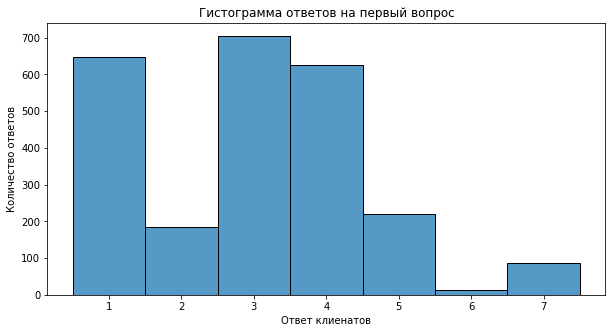

In [21]:
# Построим гистограмму распеределения ответов на второй вопрос
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df_ans2, x='Q2', discrete=True)
ax.set_title('Гистограмма ответов на первый вопрос')
ax.set_xlabel('Ответ клиенатов')
ax.set_ylabel('Количество ответов')
plt.show()

На гистограмме видно, что клиентов больше всего не устраивает плохое качество связи в зданиях, торговых центрах и пр. (ответ 3), недозвоны и обрывы связи (ответ 1) и медленный мобильный интернет (ответ 4). Посмотрим какие характеристики больше всего влияют на эти ответы. 

Постороим диаграмму рассеения для ответов на втрой вопрос и технических пораметров

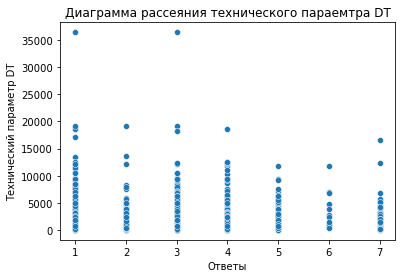

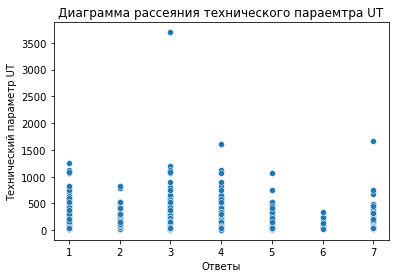

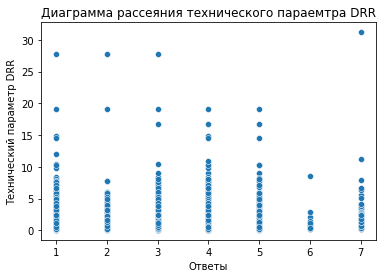

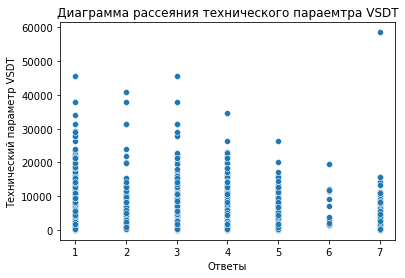

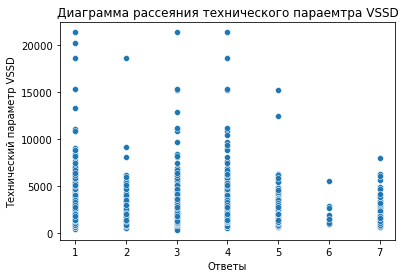

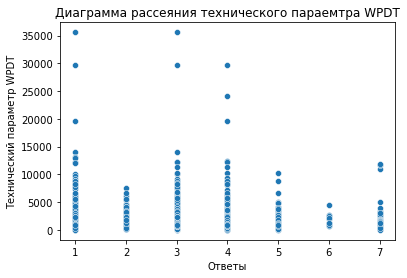

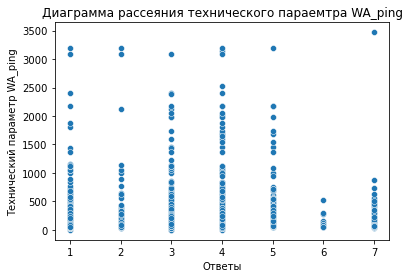

In [24]:
for i in cols[2:]:
    sns.scatterplot(data=df_ans2, x='Q2', y=i,)
    plt.title('Диаграмма рассеяния технического параемтра '+str(i))
    plt.xlabel('Ответы')
    plt.ylabel('Технический параметр '+str(i))
    plt.show()

Как и с ответами на первый вопрос наблюдается одинаковое распеределение показателей технических характеристик в зависимотси от ответа.

Проверим показатели технических характеристик на нормальность распеределения относительно ответов на втрой вопрос. Используем тот же тест Шапиро-Уилка. Выдвенем гипотезу, что показатели технических характеристик распределены нормально и проверим ее.

In [25]:
for i in range(1,8):
    for j in cols[1:]:
        df_norm = df_ans2[df_ans2['Q2']==i]
        stat, p = scipy.stats.shapiro(df_norm[j]) # тест Шапиро-Уилк

        print('Statistics=%.3f, p-value=%.3f' % (stat, p))

        alpha = 0.05
        print('Для технического показателя ' +str(j)+ ' и ответа '+str(i))
        if p > alpha:
            print('Принять гипотезу о нормальности \n')
        else:
            print('Отклонить гипотезу о нормальности \n')

Statistics=0.936, p-value=0.000
Для технического показателя TT и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.622, p-value=0.000
Для технического показателя DT и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.756, p-value=0.000
Для технического показателя UT и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.627, p-value=0.000
Для технического показателя DRR и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.778, p-value=0.000
Для технического показателя VSDT и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.581, p-value=0.000
Для технического показателя VSSD и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.519, p-value=0.000
Для технического показателя WPDT и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.467, p-value=0.000
Для технического показателя WA_ping и ответа 1
Отклонить гипотезу о нормальности 

Statistics=0.934, p-value=0.000
Для технического показателя TT и ответа 2
Отклонить гипотезу о нормальности 

И снова гипотеза о нормальности распеределения значений технических показателей не подтвердилась ни для одного ответа.

Следовательно для оценки корреляции ответов на второй вопрос и технических характеристик применем метод Спирмена.

In [27]:
df_ans2.corrwith(df_ans2['Q2'], method='spearman')

user_id   -0.007980
Q1        -0.006714
TT         0.037321
DT        -0.068494
UT        -0.072289
DRR        0.040834
VSDT      -0.100037
VSSD       0.057682
WPDT      -0.097584
WA_ping    0.063038
Q2         1.000000
dtype: float64

Корреляционные связи по шкале заметной значимости Чеддока - слабые.
##### Можно окончательно опровергнуть гипотезу, что технические характеристики влияют на ответы пользователей в проведенном опросе на второй вопрос .

## Общий вывод
### Корреляционных связей между техническими показателями и ответами пользователей не выявлено, а значит технические показатели не влияют на ответы пользователей.
##### Если взглянуть на формулировку ответов на второй вопрос и посмотреть на наиболее популярные ответы, то можно сделать вывод, что клиентов не устраивает качество сети и интернета в зданиях и ТЦ, на что следует обратить внимание.
##### Также стоит обратить внимание на загрузку потокового видео, есть слабая корреляция ответов на первый вопрос и этих технических характеристик.
В целом на ответы клиентов не влияют показатели технических характеристик. На гистограммах распределения технических показателей по ответам на первый вопрос видно, что не важно какой ответ, технические параметры в большинстве распределяются в одиних и тех же значениях технических показателй.
Так же на ответы клиентов может влиять тот факт, что у всех разные мобильные устройства, с разными техническими параметрами, годом выпуска. Какие-то поддерживают более быстрый интренет, а какие-то просто не могут обеспечить пользователя хорошими параметрами даже при условии высокого качетсва сети. Может стоит провести опрос и включить вопрос каким устройством пользуется клиент, сгруппировать утсройства по техническим параметрам и посмотреть уже после этого на полученные данные.
Так же на ответы может влиять общая лояльность к компании "Мегафон", кого-то не утсраивают тарифы, кто-то задумывается на переход к другому оператору. Можно в опрос включить еще один пункт с вопросом об удовлетворенности тарифом.
А может вообще на ответы клиентов вляют другие окружающие его факторы, не связанные с действиями компании "Мегафон".